In [21]:
import matplotlib.pyplot as plt
import pickle
import glob
import os
import numpy as np

C:\monet\monet\src/added_layers
[(10, 0.7035000085830688), (15, 0.7477499961853027), (20, 0.7832499980926514), (25, 0.8115000009536744), (30, 0.8354999899864197), (35, 0.834499990940094), (40, 0.8497500061988831), (50, 0.8627500057220459)]
[10, 15, 20, 25, 30, 35, 40, 50]
[0.7035000085830688, 0.7477499961853027, 0.7832499980926514, 0.8115000009536744, 0.8354999899864197, 0.834499990940094, 0.8497500061988831, 0.8627500057220459]
C:\monet\monet\src/maxpoolingthreedense
[(10, 0.6707500100135804), (15, 0.7067499995231629), (20, 0.7252500057220459), (25, 0.74375), (30, 0.7652500033378601), (35, 0.7862499952316284), (40, 0.8049999952316285)]
[10, 15, 20, 25, 30, 35, 40]
[0.6707500100135804, 0.7067499995231629, 0.7252500057220459, 0.74375, 0.7652500033378601, 0.7862499952316284, 0.8049999952316285]
C:\monet\monet\src/avgpoolingthreedense
[(10, 0.6692499995231629), (20, 0.7712500095367432), (30, 0.822000014781952), (40, 0.850000011920929), (50, 0.8567499995231629)]
[10, 20, 30, 40, 50]
[0.669

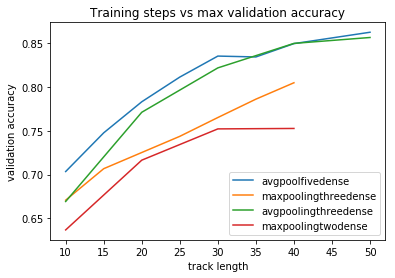

In [33]:
plt.figure()
plt.xlabel("track length")
plt.ylabel("validation accuracy")
plt.title("Training steps vs max validation accuracy")
folders = ["added_layers","maxpoolingthreedense", "avgpoolingthreedense", "maxpoolingtwodense"]
for folder in folders:
    sizes = []
    max_val_acc = []
    dir_path = os.getcwd() + "/" + folder
    print(dir_path)
    matching_files = glob.glob( dir_path +"\*_history*")

    for file in matching_files:
        with open(file, 'rb') as handle:
            history = pickle.loads(handle.read())
            train_loss = history['loss']
            val_loss   = history['val_loss']
            train_acc  = history['acc']
            val_acc    = history['val_acc']

            max_val_acc.append(np.mean(sorted(val_acc, reverse=True)[:5]))
        string = [s for s in file if s.isdigit()]
        actualstring = ""
        for s in string:
            actualstring += s
        sizes.append(int(actualstring))
    zipped = zip(sizes, max_val_acc)
    sorted_pairs = sorted(zipped)
    sizes = [sorted_pairs[i][0] for i in range(len(sorted_pairs))]
    max_val_acc = [sorted_pairs[i][1] for i in range(len(sorted_pairs))]
    print(sorted_pairs)
    print(sizes)
    print(max_val_acc)
    if folder == "added_layers":
        folder = "avgpoolfivedense"
    plt.plot(sizes, max_val_acc, label=folder)
    plt.legend()

